## パッケージのインポート

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [11]:
df = pd.read_csv('/content/SBAnational.csv', low_memory=False)

df_copy = df.copy()

## EDA

In [12]:
df.shape

(15569, 27)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15569 entries, 0 to 15568
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      15569 non-null  int64  
 1   Name               15565 non-null  object 
 2   City               15569 non-null  object 
 3   State              15568 non-null  object 
 4   Zip                15568 non-null  float64
 5   Bank               15557 non-null  object 
 6   BankState          15557 non-null  object 
 7   NAICS              15568 non-null  float64
 8   ApprovalDate       15568 non-null  object 
 9   ApprovalFY         15568 non-null  float64
 10  Term               15568 non-null  float64
 11  NoEmp              15568 non-null  float64
 12  NewExist           15568 non-null  float64
 13  CreateJob          15568 non-null  float64
 14  RetainedJob        15568 non-null  float64
 15  FranchiseCode      15568 non-null  float64
 16  UrbanRural         155

In [14]:
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     4
City                     0
State                    1
Zip                      1
Bank                    12
BankState               12
NAICS                    1
ApprovalDate             1
ApprovalFY               1
Term                     1
NoEmp                    1
NewExist                 1
CreateJob                1
RetainedJob              1
FranchiseCode            1
UrbanRural               1
RevLineCr                3
LowDoc                   1
ChgOffDate           12388
DisbursementDate        26
DisbursementGross        1
BalanceGross             1
MIS_Status              31
ChgOffPrinGr             1
GrAppv                   1
SBA_Appv                 1
dtype: int64

In [15]:
pd.options.display.max_columns=500
pd.options.display.max_rows=500
pd.options.display.max_seq_items=300

In [16]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,28-Feb-97,1997.0,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,28-Feb-97,1997.0,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,28-Feb-97,1997.0,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,28-Feb-97,1997.0,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,28-Feb-97,1997.0,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## 欠損値の処理

In [17]:
# 欠損値のあるレコードの削除
df.dropna(subset=['Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     0
City                     0
State                    0
Zip                      0
Bank                     0
BankState                0
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr                0
LowDoc                   0
ChgOffDate           12351
DisbursementDate         0
DisbursementGross        0
BalanceGross             0
MIS_Status               0
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

## データ型の確認

In [18]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                  float64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY           float64
Term                 float64
NoEmp                float64
NewExist             float64
CreateJob            float64
RetainedJob          float64
FranchiseCode        float64
UrbanRural           float64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [19]:
# オブジェクト型となっている通貨フィールドの確認
df[['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' ]].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [20]:
# '$'と','の除去
df[['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' ]] = \
df[['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' ]].applymap(lambda x: x.strip().replace('$', '').replace(',', '')).astype(float)

In [21]:
df[['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' ]].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [22]:
df[['ApprovalDate', 'ApprovalFY']].head()

,ApprovalDate,ApprovalFY
0,28-Feb-97,1997.0
1,28-Feb-97,1997.0
2,28-Feb-97,1997.0
3,28-Feb-97,1997.0
4,28-Feb-97,1997.0


In [23]:
df['ApprovalFY'].apply(type).value_counts()

<class 'float'>    15515
Name: ApprovalFY, dtype: int64

In [24]:
df[df['ApprovalFY']=='1976A']['ApprovalFY'].count()

0

In [25]:
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [26]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY           float64
Term                 float64
NoEmp                float64
NewExist               int64
CreateJob            float64
RetainedJob          float64
FranchiseCode        float64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [27]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [28]:
df['NAICS'].value_counts()

0.0         2885
722110.0     312
811111.0     300
722211.0     241
561730.0     240
            ... 
561613.0       1
721199.0       1
311411.0       1
611512.0       1
212312.0       1
Name: NAICS, Length: 889, dtype: int64

In [29]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [30]:
df['Industry'] =df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [31]:
# prompt: 'Industry'がnullのものを'Unknown'に置換
df['Industry'].fillna('Unknown', inplace=True)

In [32]:
df['Industry'].value_counts()

Unknown                     2885
Retail_trade                2334
Prof/Science/Tech           1474
Other_no_pub                1277
Construction                1196
Manufacturing               1116
Wholesale_trade             1014
Healthcare/Social_assist     888
Admin_sup/Waste_Mgmt_Rem     854
Accom/Food_serv              803
Trans/Ware                   393
RE/Rental/Lease              269
Information                  269
Arts/Entertain/Rec           250
Finance/Insurance            231
Educational                  121
Ag/For/Fish/Hunt              83
Min/Quar/Oil_Gas_ext          28
Utilities                     14
Public_Admin                  13
Mgmt_comp                      3
Name: Industry, dtype: int64

In [33]:
df['Industry'].isnull().sum()

0

In [34]:
df['FranchiseCode'].value_counts()

1.0        14638
0.0          189
78760.0       42
68020.0       20
50564.0       20
25650.0       13
79140.0       11
68021.0       11
17998.0       10
24850.0       10
84535.0       10
67750.0        8
77174.0        8
72590.0        8
21780.0        7
10528.0        7
9050.0         7
19755.0        7
66910.0        7
53250.0        7
35706.0        7
52000.0        6
10734.0        6
61901.0        6
73675.0        5
49952.0        5
3490.0         5
44081.0        5
33750.0        5
75900.0        5
1560.0         5
16310.0        4
21420.0        4
34850.0        4
48000.0        4
21425.0        4
84025.0        4
22470.0        4
68060.0        4
81630.0        4
75000.0        4
82360.0        4
36680.0        4
26650.0        3
10494.0        3
65140.0        3
29600.0        3
18925.0        3
84077.0        3
73525.0        3
65150.0        3
20550.0        3
23000.0        3
21400.0        3
17205.0        3
15100.0        3
66320.0        3
71456.0        2
46875.0       

In [35]:
df.loc[(df['FranchiseCode']<=1), 'IsFranchise' ] = 0
df.loc[(df['FranchiseCode']>1), 'IsFranchise' ] =1

In [36]:
df['NewExist'].value_counts()

1    10624
2     4852
0       39
Name: NewExist, dtype: int64

In [37]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
df['NewBusiness'] = df['NewExist'].apply(lambda x: 0 if x==1 else 2)

<ipython-input-37-34293f25539a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewBusiness'] = df['NewExist'].apply(lambda x: 0 if x==1 else 2)


In [38]:
df['NewBusiness'].replace(2, 1, inplace=True)

In [39]:
df['NewBusiness'].value_counts()

0    10624
1     4852
Name: NewBusiness, dtype: int64

In [40]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ','], dtype=object)

In [41]:
df['RevLineCr'].value_counts()

N    6913
Y    5596
0    2287
T     678
`       1
,       1
Name: RevLineCr, dtype: int64

In [42]:
df['LowDoc'].unique()

array(['Y', 'N', 'C'], dtype=object)

In [43]:
df['LowDoc'].value_counts()

N    14042
Y     1433
C        1
Name: LowDoc, dtype: int64

In [44]:
df = df[(df['RevLineCr'] == 'N') | (df['RevLineCr'] == 'Y')]
df = df[(df['LowDoc'] == 'N') | (df['LowDoc'] == 'Y')]

In [45]:
df['RevLineCr'] = df['RevLineCr'].apply(lambda x: 0 if x=='N' else 1)
df['LowDoc'] = df['LowDoc'].apply(lambda x: 0 if x=='N' else 1)

In [46]:
print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[0 1]
[1 0]


In [47]:
df['MIS_Status'].value_counts()

P I F     10193
CHGOFF     2316
Name: MIS_Status, dtype: int64

In [48]:
df['Default'] = df['MIS_Status'].apply(lambda x: 0 if x=='P I F' else 1)

In [49]:
df['Default'].value_counts()

0    10193
1     2316
Name: Default, dtype: int64

In [50]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [51]:
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']
df['DaysToDisbursement'][:5]

0   730 days
1    92 days
2   306 days
3   122 days
4    75 days
Name: DaysToDisbursement, dtype: timedelta64[ns]

In [52]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x.split()[0]).astype('int')

In [53]:
df['DaysToDisbursement']

0        730
1         92
2        306
3        122
4         75
        ... 
15560    205
15561     37
15563    113
15565     37
15566     37
Name: DaysToDisbursement, Length: 12509, dtype: int64

In [54]:
df['DisbursementDate'].value_counts()

2004-10-31    1684
2004-11-30    1609
2004-09-30    1128
2004-08-31     898
2004-12-31     795
1997-05-31     501
2004-07-31     434
1997-06-30     421
1997-04-30     398
2005-02-28     258
1997-07-31     244
2005-01-31     231
2006-02-28     206
2006-03-31     187
2004-06-30     184
2005-03-31     166
1997-03-31     149
1997-08-31     125
1997-09-30     117
2006-04-30      97
1997-10-31      90
2005-04-30      88
2004-04-30      64
2006-05-31      51
1997-11-30      47
1997-12-31      47
2004-01-31      46
2007-09-30      43
2003-12-31      42
2005-06-30      41
2004-02-29      39
1997-07-16      38
2004-05-31      37
2005-05-31      37
1997-09-17      36
1997-06-11      35
1998-01-31      35
2006-06-30      33
2003-04-30      33
2007-11-30      33
2005-09-30      31
1998-02-28      30
1998-08-31      29
1998-03-31      28
2005-08-31      27
2003-07-31      27
2003-09-30      26
2003-11-30      25
2007-08-31      25
2001-08-31      25
1998-06-30      25
2004-03-31      25
2005-07-31  

In [55]:
df['DisbursementFY'] = df['DisbursementDate'].apply(lambda x: x.year)

In [56]:
df['DisbursementFY']

0        1999
1        1997
2        1997
3        1997
4        1997
         ... 
15560    1997
15561    2004
15563    1997
15565    2004
15566    2004
Name: DisbursementFY, Length: 12509, dtype: int64

In [57]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [58]:
df['StateSame']

0        0
1        1
2        1
3        1
4        1
        ..
15560    1
15561    0
15563    0
15565    0
15566    1
Name: StateSame, Length: 12509, dtype: int64

In [59]:
df['GrAppv'].value_counts()

50000.0      2051
10000.0      1654
25000.0       923
100000.0      836
35000.0       592
             ... 
850500.0        1
62500.0         1
135700.0        1
19700.0         1
1088000.0       1
Name: GrAppv, Length: 1168, dtype: int64

In [60]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']
df['SBA_AppvPct']

0        0.800
1        0.800
2        0.750
3        0.800
4        1.000
         ...  
15560    0.900
15561    0.500
15563    0.685
15565    0.500
15566    0.500
Name: SBA_AppvPct, Length: 12509, dtype: float64

In [61]:
def classify_approval(disbursement, approval):
    if disbursement < approval:
        return 0
    elif disbursement == approval:
        return 1
    else:
        return 2

df['AppvDisbursed'] = df.apply(
    lambda x: classify_approval(x['DisbursementGross'], x['GrAppv']),
    axis=1
)

In [62]:
# df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)
df['AppvDisbursed'].value_counts()

1    8604
2    3454
0     451
Name: AppvDisbursed, dtype: int64

In [63]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                        float64
ApprovalDate          datetime64[ns]
ApprovalFY                   float64
Term                         float64
NoEmp                        float64
NewExist                       int64
CreateJob                    float64
RetainedJob                  float64
FranchiseCode                float64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [64]:
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})

In [65]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [66]:
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [67]:
df.shape

(12509, 21)

In [68]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

In [69]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) |
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)

In [70]:
df = df[df['DisbursementFY'] <= 2010]

In [71]:
df.shape

(12505, 23)

## データ分析

In [74]:
df.describe(include=['O', 'int', 'float'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,12505,12505,12505.000000,12505.000000,12505.000000,12505.00000,12505.000000,12505,12505.000000,12505.000000,1.250500e+04,1.250500e+04,12505,12505.000000,12505.00000,12505.000000,12505.000000,12505.000000,12505.000000,12505.000000,12505.000000,12505.000000,12505.000000
unique,51,52,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1549,3751,NaN,NaN,NaN,NaN,NaN,6962,NaN,NaN,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.160096,80.782487,8.441024,0.34994,0.527149,NaN,0.447501,0.114434,9.933322e+04,8.876003e+04,NaN,0.036785,0.32379,0.185046,113.426549,2002.112435,0.350980,0.585718,1.240144,0.051979,0.725470
std,NaN,NaN,4.259304,52.453656,92.574761,3.19244,5.251580,NaN,0.497256,0.318351,1.601021e+05,1.488355e+05,NaN,0.188242,0.46794,0.388350,197.938253,4.177809,0.477296,0.144453,0.504605,0.221994,0.446295
min,NaN,NaN,1978.000000,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,4.500000e+03,2.500000e+03,NaN,0.000000,0.00000,0.000000,-274.000000,1978.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,NaN,NaN,1997.000000,60.000000,2.000000,0.00000,0.000000,NaN,0.000000,0.000000,2.500000e+04,2.500000e+04,NaN,0.000000,0.00000,0.000000,28.000000,1998.000000,0.000000,0.500000,1.000000,0.000000,0.000000
50%,NaN,NaN,2004.000000,84.000000,3.000000,0.00000,0.000000,NaN,0.000000,0.000000,5.000000e+04,5.000000e+04,NaN,0.000000,0.00000,0.000000,49.000000,2004.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2005.000000,84.000000,7.000000,0.00000,0.000000,NaN,1.000000,0.000000,1.000000e+05,9.694000e+04,NaN,0.000000,1.00000,0.000000,102.000000,2004.000000,1.000000,0.750000,2.000000,0.000000,1.000000


In [77]:
df['DisbursedGreaterAppv'] = np.where(df['DisbursementGross'] > df['GrAppv'], 1, 0)

In [78]:
df = df[df['DaysToDisbursement'] >= 0]

In [79]:
df.shape

(12499, 24)

## 可視化

<ipython-input-86-314da105b3ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


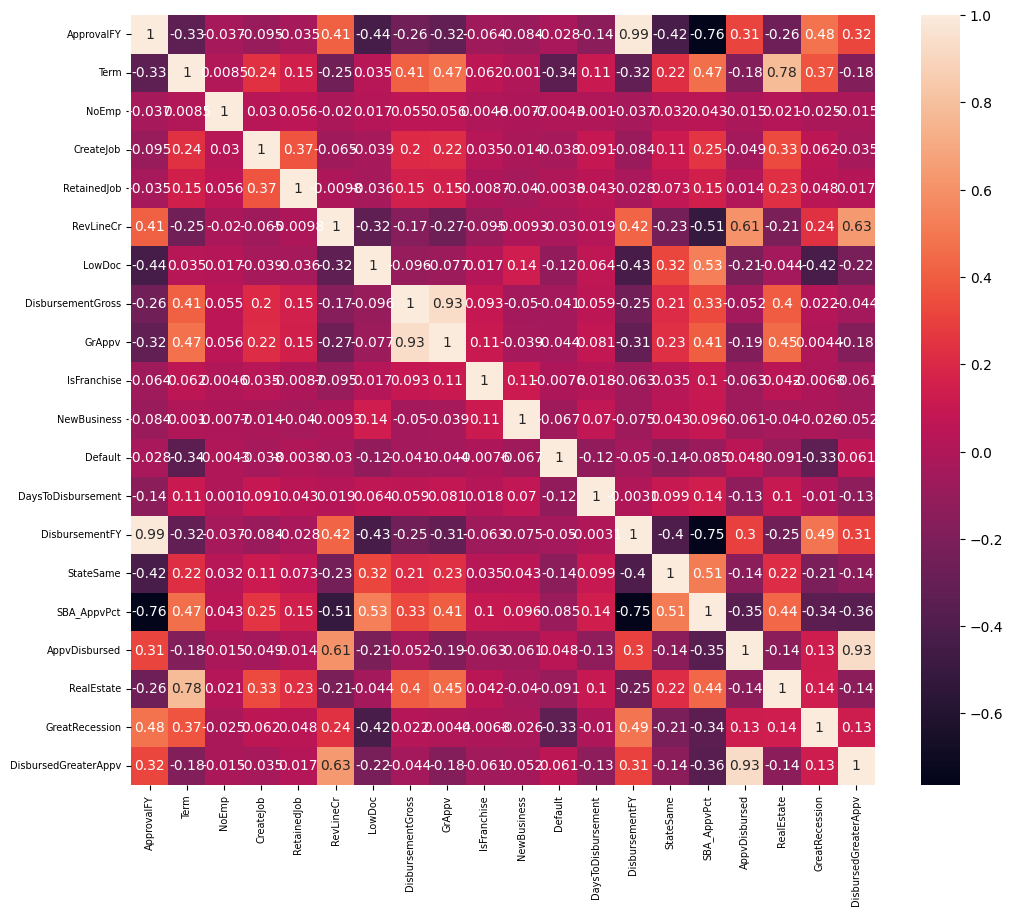

In [86]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7);

In [87]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)


<ipython-input-87-b50c9cd26278>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
<ipython-input-87-b50c9cd26278>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)


<ipython-input-88-67de2b72d03b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-88-67de2b72d03b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)


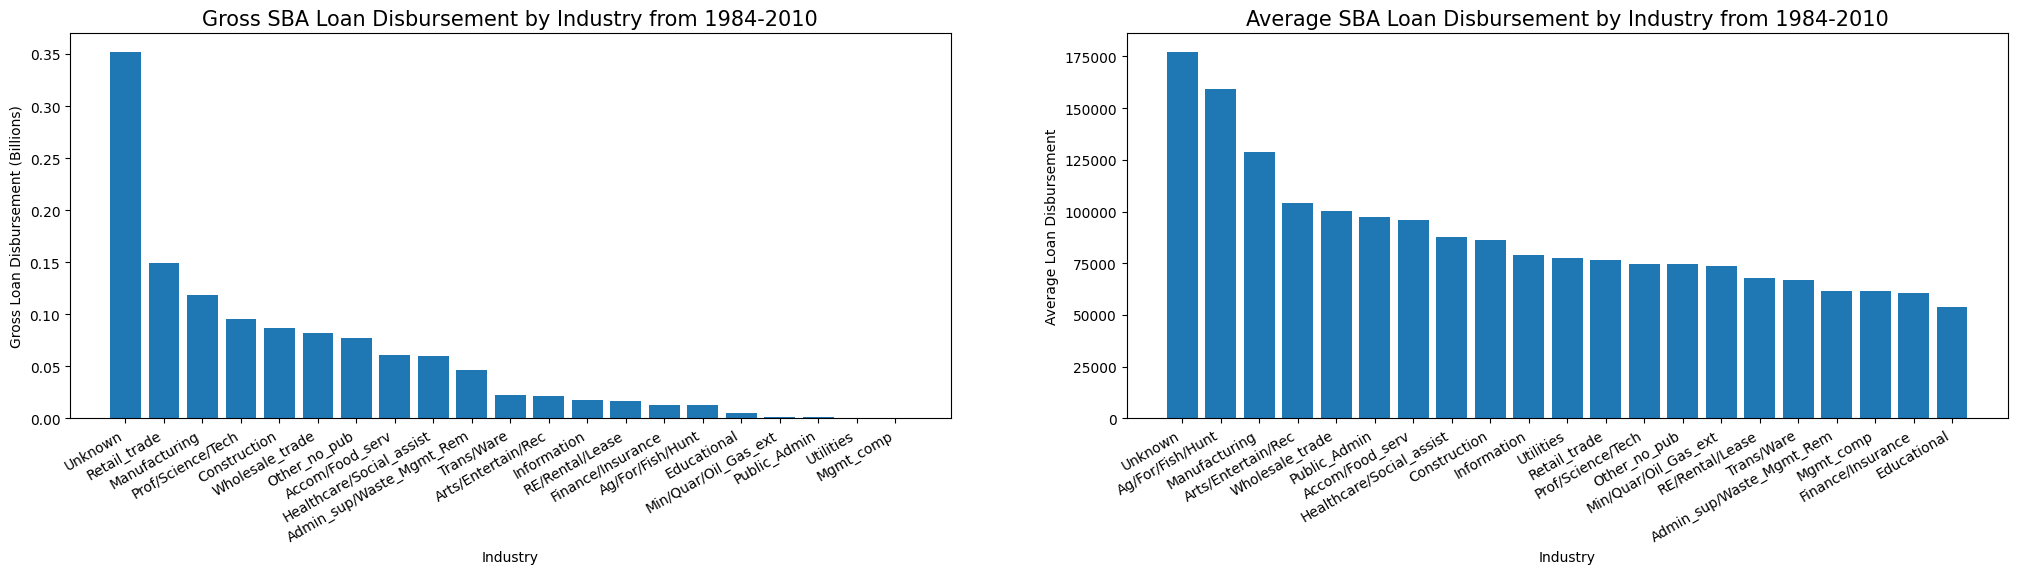

In [88]:
# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

<ipython-input-89-bcfb51932673>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


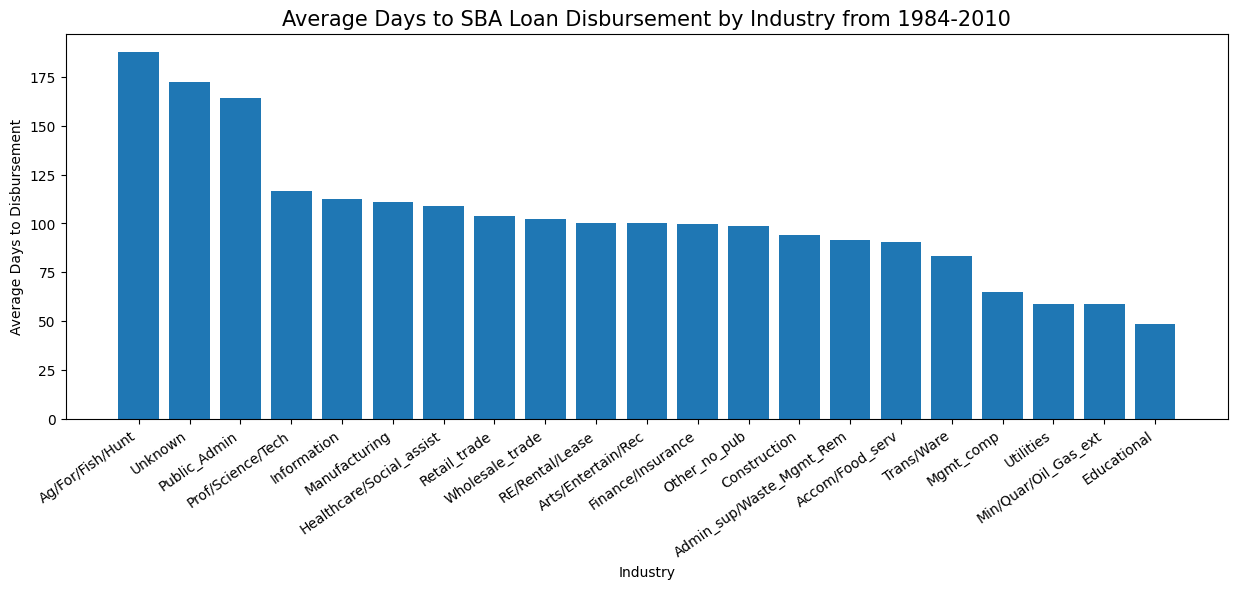

In [89]:
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

<ipython-input-93-65947af8bafd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


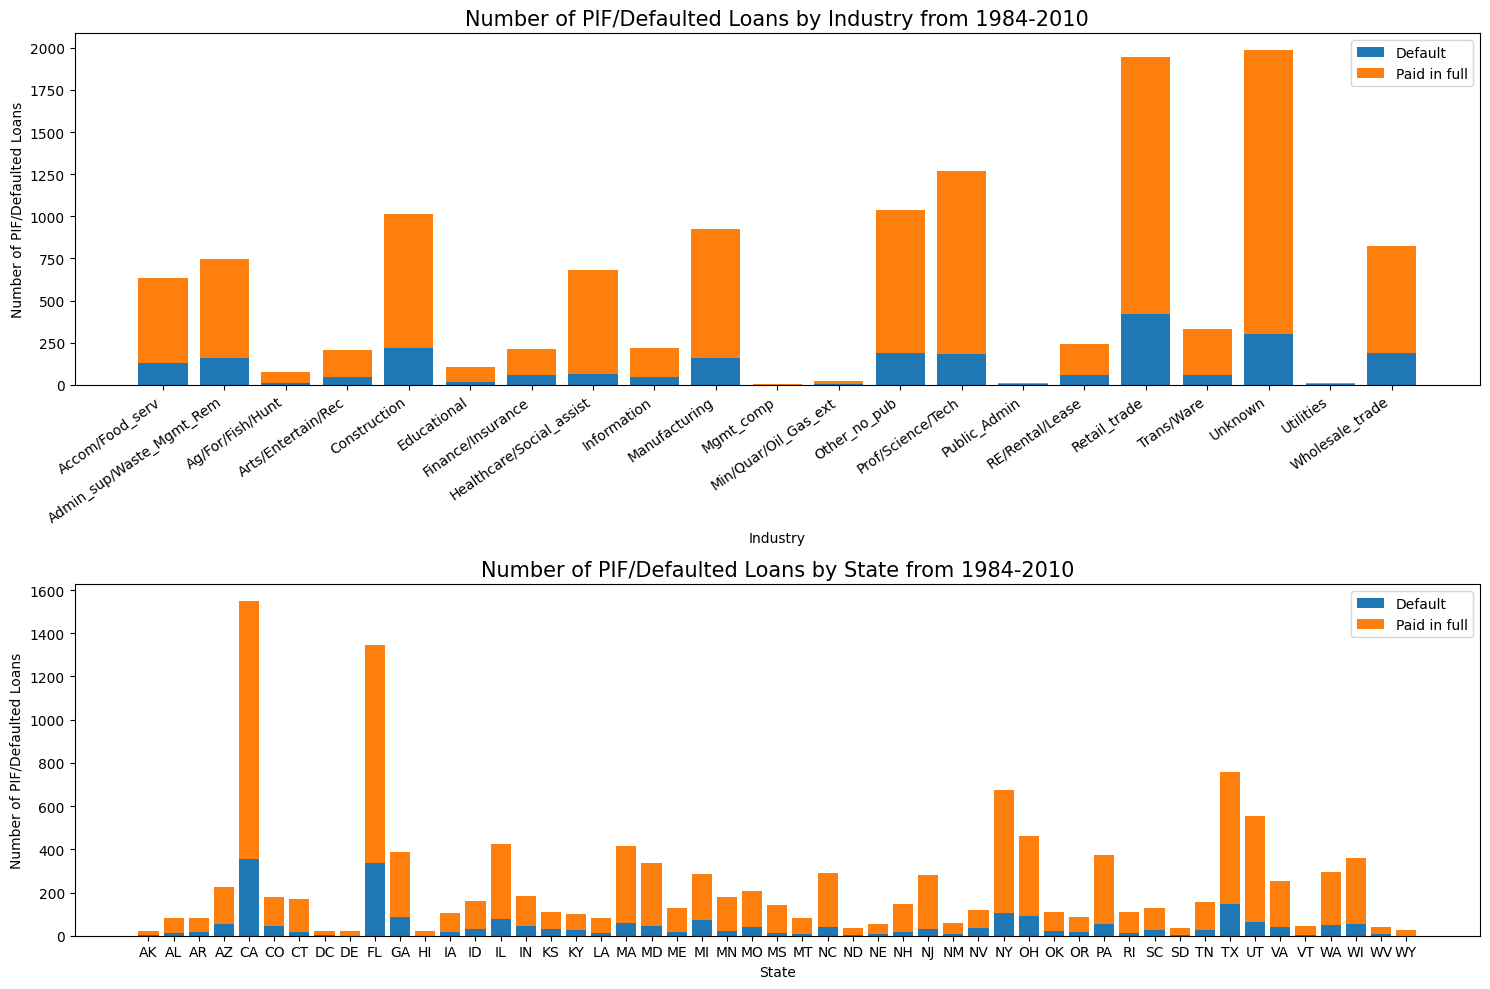

In [93]:
fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [100]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind.sort_values(by='Def_Percent',  ascending=False)

Default,0,1,Def_Percent
Industry,,,
Utilities,6,4,0.400000
Mgmt_comp,2,1,0.333333
Finance/Insurance,150,60,0.285714
RE/Rental/Lease,184,58,0.239669
Public_Admin,10,3,0.230769
Wholesale_trade,635,187,0.227494
Arts/Entertain/Rec,161,45,0.218447
Construction,791,220,0.217606
Retail_trade,1527,420,0.215716


In [101]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state.sort_values(by='Def_Percent', ascending=False)

Default,0,1,Def_Percent
State,,,
NV,82,38,0.316667
KS,77,33,0.300000
KY,74,27,0.267327
IN,137,46,0.251366
FL,1008,338,0.251114
CO,133,44,0.248588
MI,215,71,0.248252
AZ,171,54,0.240000
CA,1195,354,0.228535


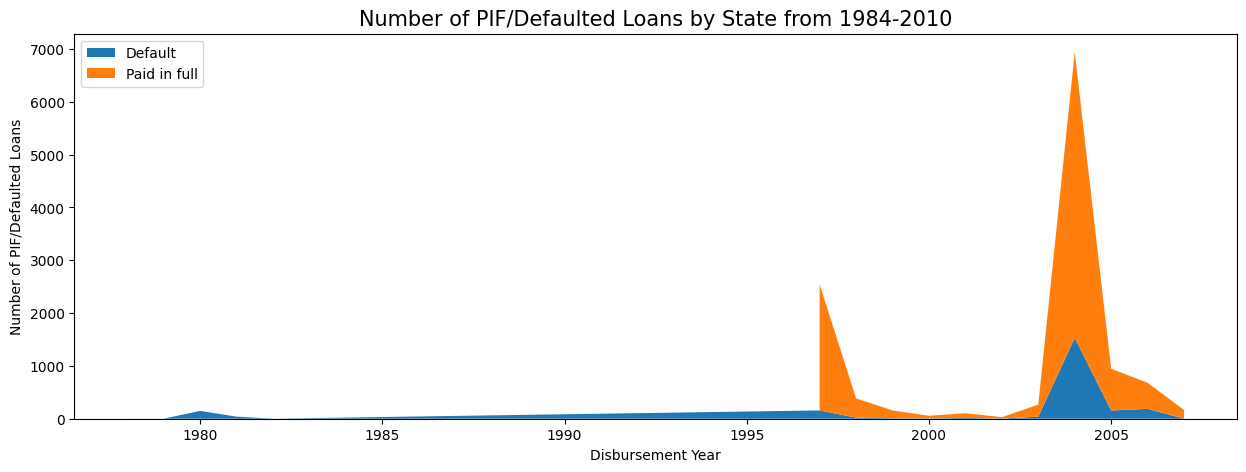

In [102]:
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

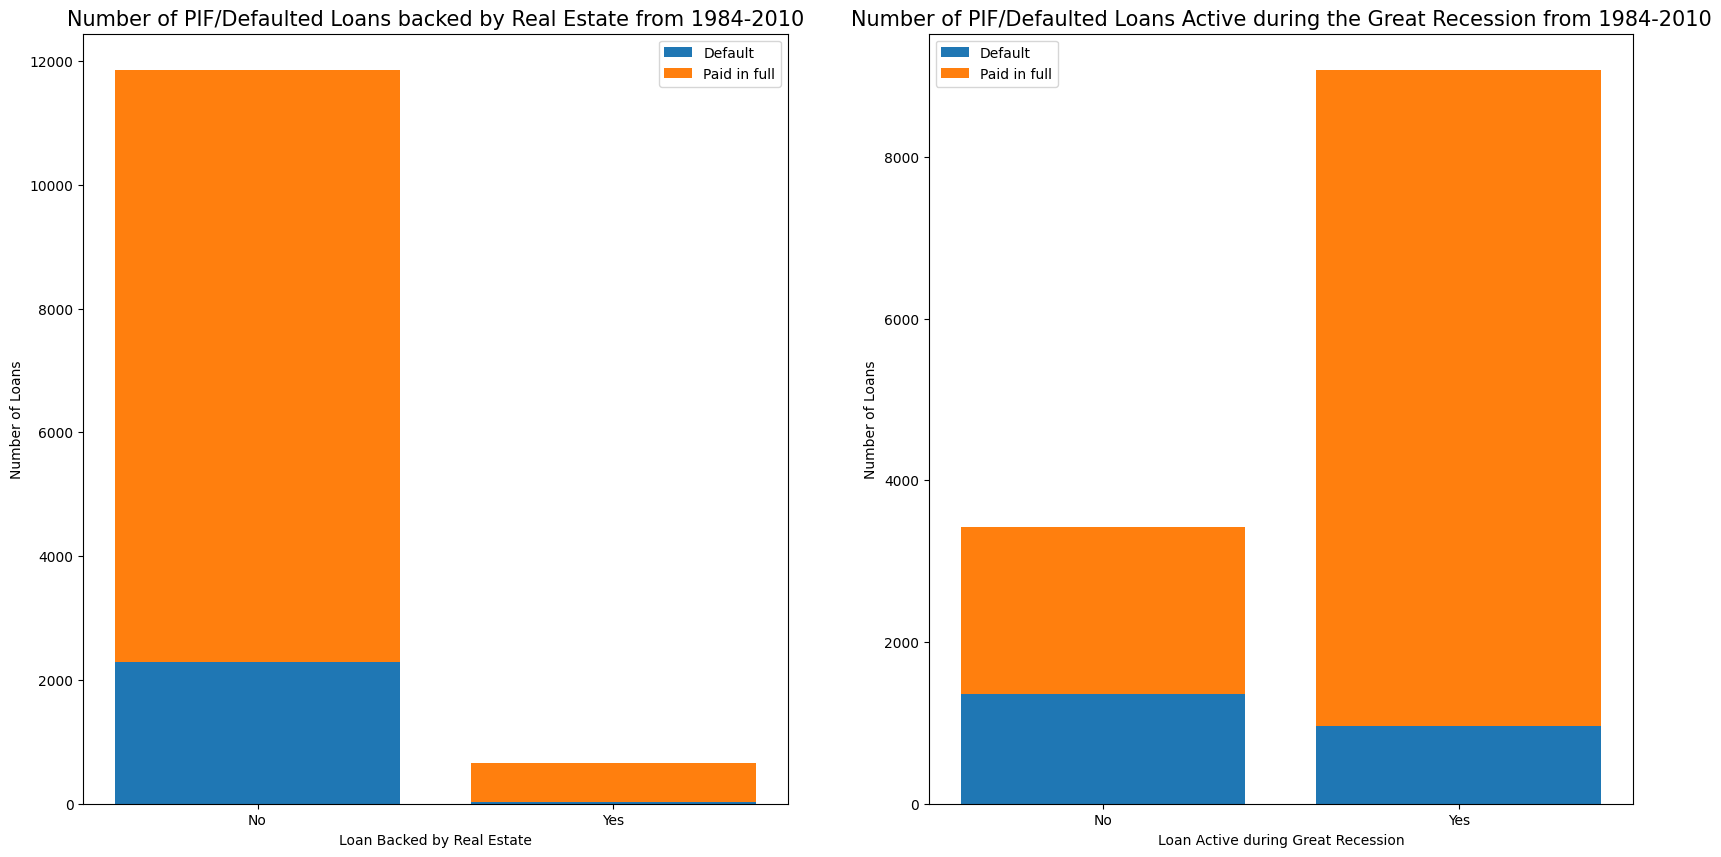

In [103]:
fig5 = plt.figure(figsize=(20, 10))

ax1b = fig5.add_subplot(1, 2, 1)
ax2b = fig5.add_subplot(1, 2, 2)

stacked_setup(df=df, col='RealEstate', axes=ax1b)
ax1b.set_xticks(df.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()

# Paid in full and defaulted loans active during the Great Recession
stacked_setup(df=df, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(df.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

In [104]:
def_re = df.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

Default,0,1,Def_Percent
RealEstate,,,
0,9558,2291,0.193350
1,628,22,0.033846


In [105]:
def_gr = df.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default')
def_gr['Def_Percent'] = def_gr[1]/(def_gr[1] + def_gr[0])
def_gr

Default,0,1,Def_Percent
GreatRecession,,,
0,2076,1352,0.394399
1,8110,961,0.105942


## モデリング

In [106]:
df.dtypes

State                    object
BankState                object
ApprovalFY              float64
Term                    float64
NoEmp                   float64
CreateJob               float64
RetainedJob             float64
UrbanRural               object
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int64
DaysToDisbursement        int64
DisbursementFY            int64
StateSame                 int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int64
dtype: object

In [107]:
df = pd.get_dummies(df)
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,BankState_AK,BankState_AL,BankState_AR,BankState_AZ,BankState_CA,BankState_CO,BankState_CT,BankState_DC,BankState_DE,BankState_FL,BankState_GA,BankState_HI,BankState_IA,BankState_ID,BankState_IL,BankState_IN,BankState_KS,BankState_KY,BankState_LA,BankState_MA,BankState_MD,BankState_ME,BankState_MI,BankState_MN,BankState_MO,BankState_MS,BankState_MT,BankState_NC,BankState_ND,BankState_NE,BankState_NH,BankState_NJ,BankState_NM,BankState_NV,BankState_NY,BankState_OH,BankState_OK,BankState_OR,BankState_PA,BankState_PR,BankState_RI,BankState_SC,BankState_SD,BankState_TN,BankState_TX,BankState_UT,BankState_VA,BankState_VT,BankState_WA,BankState_WI,BankState_WV,BankState_WY,UrbanRural_0.0,UrbanRural_1.0,UrbanRural_2.0,Industry_Accom/Food_serv,Industry_Admin_sup/Waste_Mgmt_Rem,Industry_Ag/For/Fish/Hunt,Industry_Arts/Entertain/Rec,Industry_Construction,Industry_Educational,Industry_Finance/Insurance,Industry_Healthcare/Social_assist,Industry_Information,Industry_Manufacturing,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Unknown,Industry_Utilities,Industry_Wholesale_trade
0,1997.0,84.0,4.0,0.0,0.0,0,1,60000.0,60000.0,0,1,0,730,1999,0,0.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1997.0,60.0,2.0,0.0,0.0,0,1,40000.0,40000.0,0,1,0,92,1997,1,0.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997.0,180.0,7.0,0.0,0.0,0,0,287000.0,287000.0,0,0,0,306,1997,1,0.75,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997.0,60.0,2.0,0.0,0.0,0,1,35000.0,35000.0,0,0,0,122,1997,1,0.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1997.0,240.0,14.0,7.0,7.0,0,0,229000.0,229000.0,0,0,0,75,1997,1,1.00,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [108]:
df.shape

(12499, 147)

In [110]:
y = df['Default']
X = df.drop(columns='Default')

In [111]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.25)

In [113]:
# Initialize model
log_reg = LogisticRegression(random_state=2)

# Train the model and make predictions
log_reg.fit(X_train, y_train)
y_logpred = log_reg.predict(X_val)

# Print the results
print(classification_report(y_val, y_logpred, digits=3))

              precision    recall  f1-score   support

           0      0.925     0.966     0.945      2545
           1      0.814     0.657     0.727       580

    accuracy                          0.908      3125
   macro avg      0.870     0.811     0.836      3125
weighted avg      0.905     0.908     0.905      3125



In [114]:
xgboost = XGBClassifier(random_state=2)

xgboost.fit(X_train, y_train)
y_xgbpred = xgboost.predict(X_val)

# Print the results
print(classification_report(y_val, y_xgbpred, digits=3))

              precision    recall  f1-score   support

           0      0.968     0.978     0.973      2545
           1      0.899     0.857     0.877       580

    accuracy                          0.956      3125
   macro avg      0.933     0.917     0.925      3125
weighted avg      0.955     0.956     0.955      3125



In [133]:
pnames = []
pvalues = []
for name, importance in sorted(zip(X.columns, xgboost.feature_importances_)):
    pnames.append(name)
    pvalues.append(importance)
ip = dict(zip(pnames, pvalues))
for k, v in sorted(ip.items(), key=lambda x: x[1], reverse=True):
    print(f' {k} =  {v}')

 BankState_RI =  0.3740701377391815
 ApprovalFY =  0.06803406774997711
 Term =  0.05407659336924553
 StateSame =  0.04894768074154854
 State_MS =  0.030190305784344673
 BankState_VA =  0.02729245461523533
 RetainedJob =  0.0245529692620039
 BankState_NC =  0.01874927431344986
 BankState_SD =  0.01565556973218918
 GreatRecession =  0.012109693139791489
 LowDoc =  0.010194587521255016
 DisbursementFY =  0.01019084919244051
 UrbanRural_0.0 =  0.008775725029408932
 BankState_UT =  0.00873563438653946
 State_CA =  0.008715824224054813
 State_ME =  0.0085825864225626
 BankState_CA =  0.008364131674170494
 AppvDisbursed =  0.008246086537837982
 UrbanRural_1.0 =  0.0075745005160570145
 RevLineCr =  0.007353650871664286
 State_UT =  0.007324788719415665
 SBA_AppvPct =  0.007323374040424824
 State_NY =  0.007100503426045179
 Industry_Healthcare/Social_assist =  0.006436422932893038
 State_CT =  0.005836169235408306
 DisbursementGross =  0.0058306921273469925
 NewBusiness =  0.005634295288473368


In [134]:
xgb_featimp = XGBClassifier(random_state=2)

pipe = Pipeline(steps=[
    ('feature_selection', SelectKBest()),
    ('model', xgb_featimp)
])

pipe.fit(X_train, y_train)
y_featimppred = pipe.predict(X_val)

print(classification_report(y_val, y_featimppred, digits=3))

              precision    recall  f1-score   support

           0      0.961     0.973     0.967      2545
           1      0.874     0.828     0.850       580

    accuracy                          0.946      3125
   macro avg      0.918     0.900     0.909      3125
weighted avg      0.945     0.946     0.945      3125



In [135]:
for name, importance in sorted(zip(X.columns, xgb_featimp.feature_importances_)):
    print(name, "=", importance)

ApprovalFY = 0.21580175
CreateJob = 0.13668767
DisbursementGross = 0.126556
GrAppv = 0.07809403
IsFranchise = 0.031988334
LowDoc = 0.23851962
NoEmp = 0.02180244
RetainedJob = 0.09933106
RevLineCr = 0.0
Term = 0.051219203
